## Load Data

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt       # Standard plotting library


# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('data/application_train.csv')
#train_size_ = application_train_.shape[0]
#application_test_ = pd.read_csv('data/application_test.csv')
#data = pd.concat((application_train_, application_test_)).reset_index(drop=True)

# Display the first record
display(data.head(n=5))


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Total number of records
n_records = data.shape[0]

# Total of repaid loans
n_paid = len(np.where(data['TARGET'] == 0)[0])

# Total of default loans
n_default = len(np.where(data['TARGET'] == 1)[0])

#Total of applicatns with income greater than 100K
n_greater_100k = len(np.where(data['AMT_INCOME_TOTAL'] >= 100000.0 )[0])

#Total of applicatns with income below than 100K
n_below_100k = len(np.where(data['AMT_INCOME_TOTAL'] < 100000.0 )[0])

print("Total number of loan applications: {}".format(n_records))
print("Total number of loan application that were fully paid: {}".format(n_paid))
print("Total number of loan applications that defaulted: {}".format(n_default))
print("Total number of applicants with income greater than 100K: {}".format(n_greater_100k))
print("Total number of applicants with income below 100K: {}".format(n_below_100k))


Total number of loan applications: 307511
Total number of loan application that were fully paid: 282686
Total number of loan applications that defaulted: 24825
Total number of applicants with income greater than 100K: 243813
Total number of applicants with income below 100K: 63698


In [36]:
display(data.describe())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


We can see that we have many columns that have high variance

### Handle Missing Data


Now that we have successfully transformed skewed data in our dataset, we need to also normalize all numerical features in the data set. This can be done by applying some type of scaling on the numerical features. Normalization ensures data are treated equally during supervised learning by having equal scale.

Before we start normalizing our dataset, we need to deal with missing data. We will need to either remove or correct them depending on the number of missing values for each feature. 

In [39]:
n_features_missing = [feature for feature in data if data[feature].isnull().sum() > 0]
n_features_numerical = [feature for feature in data if data[feature].dtype != 'object']
n_features_categorical = [feature for feature in data if data[feature].dtype == 'object']
print('Number of Features that contain missing values: {}'.format(len(n_features_missing)))
print('Number of Categorical Features: {}'.format(len(n_features_categorical)))
print('Number of Numerical Features: {}'.format(len(n_features_numerical)))

for feature in data: 
    missing_total = data[feature].isnull().sum()
    if missing_total > 0:
        print("Missing", missing_total, 'from', feature, 'which represents {:.04}%'.format((missing_total / len(data))*100))

Number of Features that contain missing values: 67
Number of Categorical Features: 16
Number of Numerical Features: 106
Missing 12 from AMT_ANNUITY which represents 0.003902%
Missing 278 from AMT_GOODS_PRICE which represents 0.0904%
Missing 1292 from NAME_TYPE_SUITE which represents 0.4201%
Missing 202929 from OWN_CAR_AGE which represents 65.99%
Missing 96391 from OCCUPATION_TYPE which represents 31.35%
Missing 2 from CNT_FAM_MEMBERS which represents 0.0006504%
Missing 173378 from EXT_SOURCE_1 which represents 56.38%
Missing 660 from EXT_SOURCE_2 which represents 0.2146%
Missing 60965 from EXT_SOURCE_3 which represents 19.83%
Missing 156061 from APARTMENTS_AVG which represents 50.75%
Missing 179943 from BASEMENTAREA_AVG which represents 58.52%
Missing 150007 from YEARS_BEGINEXPLUATATION_AVG which represents 48.78%
Missing 204488 from YEARS_BUILD_AVG which represents 66.5%
Missing 214865 from COMMONAREA_AVG which represents 69.87%
Missing 163891 from ELEVATORS_AVG which represents 53.3%

From above lines, we can see that we are missing many feature values. However, we're not interested in all of the features. Therefore, we will only preprocess the below features and make sure they're fully processed. 
AMT_ANNUITY

        - Missing 12 from AMT_ANNUITY which represents 0.003902%
        - Missing 278 from AMT_GOODS_PRICE which represents 0.0904%
        - Missing 1292 from NAME_TYPE_SUITE which represents 0.4201%
        - Missing 202929 from OWN_CAR_AGE which represents 65.99%
        - Missing 96391 from OCCUPATION_TYPE which represents 31.35%
        - Missing 2 from CNT_FAM_MEMBERS which represents 0.0006504%

Lucky for us that half of the features we're interested in don't have too many missing values. We will delete all rows with missing values for all the above features except NAME_TYPE_SUITE, OWN_CAR_AGE and OCCUPATION_TYPE.

NAME_TYPE_SUITE missing values count is quite large and may affect our final results in case we delete the missing feature values. We wil replace the missing values with the most common one since it is a categorical feature

OWN_CAR_AGE is missing values for those whom do not own a car. Therefore, we will replace missing values with 0 as an indication for not owning a car.

In [40]:
print("Let's find out the most common feature value for NAME_TYPE_SUITE...\n")
print(data['NAME_TYPE_SUITE'].value_counts())
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].fillna('Unaccompanied')
print('\nNow dataset has', data['NAME_TYPE_SUITE'].isnull().sum(), 'NaN values for NAME_TYPE_SUITE')


Let's find out the most common feature value for NAME_TYPE_SUITE...

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Now dataset has 0 NaN values for NAME_TYPE_SUITE


In [41]:
#Handle OWN_CAR_AGE Missing values. 
car_owners_total = len(np.where(data['FLAG_OWN_CAR'] == 'N')[0]) # Count of applicants not owning a car
missing_car_age_total = data['OWN_CAR_AGE'].isnull().sum() # Count of records missing car age 

#Replace NaN values with 0s for those applicants not owning a car
data['OWN_CAR_AGE'] = data.apply( 
    lambda row: 0 if row['FLAG_OWN_CAR'] == 'N' else (0 if row['FLAG_OWN_CAR'] == 'Y' and np.isnan(row['OWN_CAR_AGE']) else row['OWN_CAR_AGE']),
    axis=1
)

missing_car_age_total_AFTER_replacement = data['OWN_CAR_AGE'].isnull().sum()

print('Dataset is missing', missing_car_age_total, "applicants car age")
print('Completed replacement of', missing_car_age_total - missing_car_age_total_AFTER_replacement,'NaN values')


Dataset is missing 202929 applicants car age
Completed replacement of 202929 NaN values


In [44]:
#Handle missing Occupation type
missing_occupation = data[data['OCCUPATION_TYPE'].isnull()]
missing_occupation['NAME_INCOME_TYPE'].value_counts()
pen = data[data['NAME_INCOME_TYPE'] == 'Pensioner']


In [8]:
#Remove records where missing features are less than 5% of total dataset
target = data['TARGET'] # test dataset contains NaNs. lets not drop this column 
data = data.dropna(subset=['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'])

a = data.isnull().sum()
nan_columns = a.index[a > 0].tolist()

#replace NaN values with -999 
data.fillna(-999, inplace=True)
data['TARGET'] = target


In [9]:
data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

In [10]:
# Feature engineering
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].abs()//365
data["DAYS_BIRTH"] = data["DAYS_BIRTH"].abs()//365
data["DAYS_REGISTRATION"] = data["DAYS_REGISTRATION"].abs()//365
data["DAYS_ID_PUBLISH"] = data["DAYS_ID_PUBLISH"].abs()//365
data["DAYS_LAST_PHONE_CHANGE"] = data["DAYS_LAST_PHONE_CHANGE"].abs()//365

data['AMT_INCOME_TOTAL'] = data['AMT_INCOME_TOTAL'] //1000
data['AMT_CREDIT'] = data['AMT_CREDIT'] // 1000
data['AMT_ANNUITY'] = data['AMT_ANNUITY'] // 1000
data['AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'] // 1000

In [17]:
data['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)
data['CODE_GENDER'].replace('XNA', 'F', inplace=True)

## Data Preprocessing

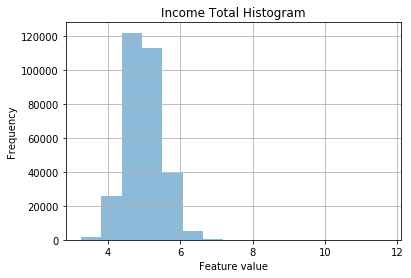

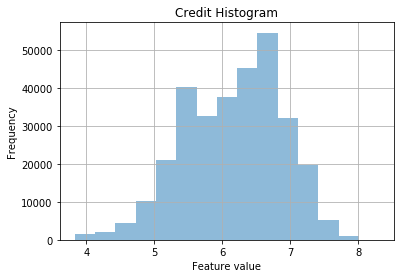

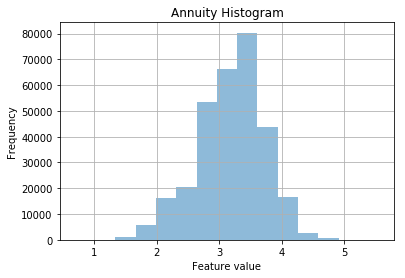

In [18]:
# Visualize skewed continuous features of original data
data['AMT_INCOME_TOTAL'].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Income Total Histogram")
plt.show()

data['AMT_CREDIT'].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Credit Histogram")
plt.show()

data['AMT_ANNUITY'].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Annuity Histogram")
plt.show()



For highly-skewed feature distributions such as `'AMT_CREDIT'` and `'AMT_ANNUITY'`, it is common practice to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers 

In [19]:
# Log-transform the skewed features
skewed = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
features_log_transformed = pd.DataFrame(data = data)
features_log_transformed[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

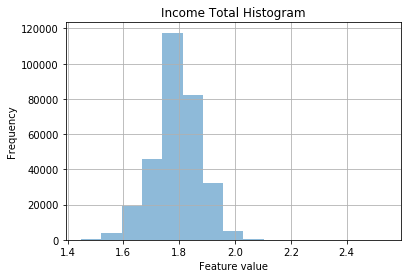

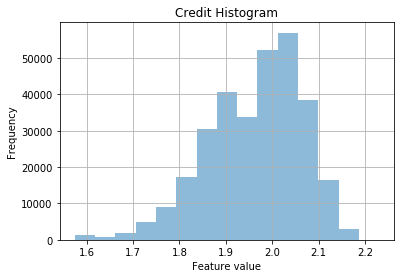

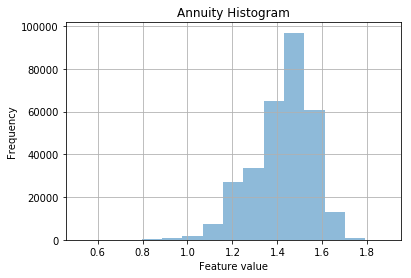

In [20]:
# Visualize after log transformation
features_log_transformed['AMT_INCOME_TOTAL'].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Income Total Histogram")
plt.show()

features_log_transformed['AMT_CREDIT'].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Credit Histogram")
plt.show()

features_log_transformed['AMT_ANNUITY'].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Annuity Histogram")
plt.show()

In [21]:
features_log_transformed.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,1.842644,1.947168,1.439569,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,1.887391,2.099917,1.522467,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,1.652403,1.777095,1.080418,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,1.777095,1.908980,1.481877,...,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,100007,0,Cash loans,M,N,Y,0,1.758551,1.979928,1.408800,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Normalizing Numerical Features


In [22]:
#Convert categorical features into numerical representation
features_log_transformed.to_csv('data/application_train_visualization.csv', index=False)

#get all features that 
numerical_features_all = [col for col in features_log_transformed.columns if features_log_transformed[col].dtype != 'object' 
                and col.find('FLAG') != 0
                and col != 'TARGET'
                and col != 'SK_ID_CURR'
               ]

#find features where its values > 1 or < -1 for scaling in next step
a= [col for col in numerical_features_all if (np.where(features_log_transformed[col] > 1)[0].shape[0] > 0)] 
b= [col for col in numerical_features_all if (np.where(features_log_transformed[col] < -1)[0].shape[0] > 0)]

numerical_features = a + b

print('We will normalize only ', len(numerical_features), 'out of', len(numerical_features_all), 'numerical features')


We will normalize only  81 out of 78 numerical features


In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # default=(0, 1)

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical_features] = scaler.fit_transform(features_log_transformed[numerical_features])
features_log_minmax_transform.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0.0,0.244311,0.486854,0.519304,...,0,0,0,0,0.996012,0.991071,0.992056,0.973684,0.792857,0.976562
1,100003,0,Cash loans,F,N,N,0.0,0.278657,0.745153,0.594277,...,0,0,0,0,0.996012,0.991071,0.992056,0.973684,0.792857,0.975586
2,100004,0,Revolving loans,M,Y,Y,0.0,0.114293,0.242071,0.257575,...,0,0,0,0,0.996012,0.991071,0.992056,0.973684,0.792857,0.975586
3,100006,0,Cash loans,F,N,Y,0.0,0.196694,0.428211,0.556790,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,100007,0,Cash loans,M,N,Y,0.0,0.183780,0.538977,0.493021,...,0,0,0,0,0.996012,0.991071,0.992056,0.973684,0.792857,0.975586


### One-hot Encoding

Note that the dataset contains many categorical features. These features need to be encoded to binary representations as many of learning algorithms expect numerical values and cannot work with categorical values. 

In [67]:
#Convert categorical features into numerical representation
features_final = pd.get_dummies(features_log_minmax_transform)
features_final.to_csv('data/application_train_final.csv', index=False)

In [60]:

#application_train = features_final.copy()
#application_train.to_csv('data/application_train_final.csv', index=False)